# Виктор Воробьев - анализ данных о видеоиграх в Steam
Датасет содержит данные по играм в Steam, где:  
ResponseName - Название игры  
ReleaseDate - дата выхода  
Metacritic - количество отзывов на сайте Metacritic.com  
RecommendationCount - количество рекомендаций игры в Steam  
IsFree - показывает, платная игра или нет  
GenreIsNonGame - жанр игры "Не игра"  
GenreIsIndie - жанр игры "Инди"  
GenreIsAction - жанр игры "Экшн"  
GenreIsAdventure - жанр игры "Приключенческая"  
GenreIsCasual - жанр игры "Казуальная"  
GenreIsStrategy - жанр игры "Стратегия"  
GenreIsRPG - жанр игры "Ролевая"  
GenreIsSimulation - жанр игры "Симулятор"  
GenreIsEarlyAccess - жанр игры "С ранним доступом"  
GenreIsFreeToPlay - жанр игры "Бесплатная"  
GenreIsSports - жанр игры "Спорт"  
GenreIsRacing - жанр игры "Гонки"  
GenreIsMassivelyMultiplayer - жанр игры "Многопользовательская"  
PriceInitial - цена игры в $

In [65]:
import numpy as np
import pandas as pd
games = pd.read_csv('games-features-edit.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

Только у показателя ReleaseDate есть пропуски в данных. Все остальные показатели не содержат пропусков.

In [66]:
games['ReleaseDate'].value_counts()

Aug 22 2016    241
Aug 26 2016    152
Sep 9 2016      77
Sep 7 2016      68
Apr 5 2016      64
              ... 
Jul 20 2011      1
Jun 10 2011      1
May 14 2011      1
May 17 2011      1
Nov 16 2016      1
Name: ReleaseDate, Length: 2037, dtype: int64

Из распределения делаем вывод, что 22 августа 2016 года вышло больше высего игр в Steam

In [67]:
games.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,False,False,False,False,False,False,False,False,9.99
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,False,False,False,False,False,False,False,False,4.99


In [68]:
games['TrueDate'] = games['ReleaseDate'].dropna()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ResponseName                 12624 non-null  object 
 1   ReleaseDate                  12538 non-null  object 
 2   Metacritic                   12624 non-null  int64  
 3   RecommendationCount          12624 non-null  int64  
 4   IsFree                       12624 non-null  bool   
 5   GenreIsNonGame               12624 non-null  bool   
 6   GenreIsIndie                 12624 non-null  bool   
 7   GenreIsAction                12624 non-null  bool   
 8   GenreIsAdventure             12624 non-null  bool   
 9   GenreIsCasual                12624 non-null  bool   
 10  GenreIsStrategy              12624 non-null  bool   
 11  GenreIsRPG                   12624 non-null  bool   
 12  GenreIsSimulation            12624 non-null  bool   
 13  GenreIsEarlyAcce

В датасете есть проблема с Датой релиза. Месяц указан словами, у некоторых игр есть только месяц и год, а у некоторых и восе нет даты. Следовательно, перевести Столбец в формат даты не получится

In [69]:
games['PriceInitial'].describe()

count    12624.000000
mean         9.290024
std         14.164946
min          0.000000
25%          1.990000
50%          5.990000
75%          9.990000
max        449.990000
Name: PriceInitial, dtype: float64

Самая дорогая игра стоит 449.99, самая дешевая - 0. При этом 75% игр стоят дешевле 9.99.

In [70]:
games.sort_values(by=('PriceInitial'))

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,TrueDate
12623,What The Heck Dude?,Nov 2 2016,0,0,False,False,True,True,False,True,False,False,True,True,False,False,False,False,0.00,Nov 2 2016
1809,Super Crate Box,Aug 29 2012,0,6179,True,False,True,True,False,False,False,False,False,False,True,False,False,False,0.00,Aug 29 2012
4409,Cubic Castles,Aug 13 2014,0,3503,True,False,True,True,True,True,False,False,False,False,True,False,False,True,0.00,Aug 13 2014
1812,The Lord of the Rings Online,Jun 6 2012,86,5405,True,False,False,False,False,False,False,True,False,False,True,False,False,True,0.00,Jun 6 2012
11168,Volleyball Unbound - Pro Beach Volleyball,October 2016,0,0,False,False,False,False,False,False,False,False,False,True,False,True,False,False,0.00,October 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,ChessBase 13 Pro,Aug 4 2016,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,234.99,Aug 4 2016
5017,Atavism MMO Creator,Jan 20 2015,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,399.00,Jan 20 2015
12271,VEGAS Pro 14 Edit Steam Edition,Sep 30 2016,0,137,False,True,False,False,False,False,False,False,False,False,False,False,False,False,399.00,Sep 30 2016
3222,VEGAS Pro 13 Edit - Steam Powered,Nov 2 2015,0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,399.99,Nov 2 2015


Самой дорогой игрой является SolidFace Parametric CAD Modeler 2D/3D, при этом она не имеет рекомендаций и отзывов.

In [71]:
games.sort_values(by=('RecommendationCount'))

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,TrueDate
6311,METAL SLUG 2,Apr 14 2016,0,0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,6.99,Apr 14 2016
8378,Adelantado Trilogy. Book one,Dec 1 2015,0,0,False,False,False,False,True,True,True,False,True,False,False,False,False,False,4.99,Dec 1 2015
8379,Wheres My Mommy?,Mar 1 2016,0,0,False,False,True,True,True,True,False,False,True,False,False,False,True,False,5.99,Mar 1 2016
8381,Summer Fling,Jun 16 2016,0,0,False,False,True,False,False,True,False,False,False,False,False,False,False,False,8.99,Jun 16 2016
8382,Apocalypse Hotel - The Post-Apocalyptic Hotel ...,Jan 26 2016,0,0,False,False,True,False,False,True,False,True,True,False,False,False,False,False,6.99,Jan 26 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4028,Unturned,Jul 7 2014,0,222301,True,False,True,True,True,True,False,False,False,True,True,False,False,False,0.00,Jul 7 2014
150,Garrys Mod,Nov 29 2006,0,237684,False,False,True,False,False,False,False,False,True,False,False,False,False,False,9.99,Nov 29 2006
20,Team Fortress 2,Oct 10 2007,92,383949,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.00,Oct 10 2007
23,Dota 2,Jul 9 2013,90,590480,True,False,False,True,False,False,True,False,False,False,True,False,False,False,0.00,Jul 9 2013


Самой рекомендуемой игрой является Counter-Strike: Global Offensive. На втором месте по количеству рекомендаций - Dota 2

<AxesSubplot:>

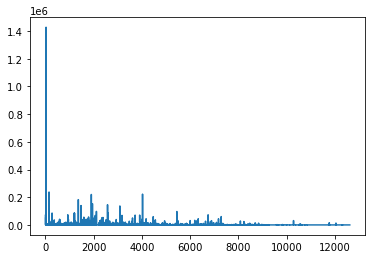

In [72]:
games['RecommendationCount'].plot()

На графике видно распределение игр по количеству рекомендаций. Далее на основе этого параметра добавляем новую переменную, которая будет разделять игры по популярности на 5 категорий в зависимости от количества рекомендаций

In [100]:
def recs_cat(recs):
    if recs == 0:
        return 'Совсем не популярная'
    elif recs < 500:
        return 'Не очень популярная игра'
    elif recs < 1000:
        return 'Игра средней популярности'
    elif recs <= 2000:
        return 'Популярная игра'
    elif recs > 2000:
        return 'Очень популярная игра'
    else:
        return recs

In [101]:
games['Recomendation Category'] = games['RecommendationCount'].apply(recs_cat)

In [102]:
games[['Recomendation Category','RecommendationCount']].head()

,Recomendation Category,RecommendationCount
0,Очень популярная игра,68991
1,Очень популярная игра,2439
2,Очень популярная игра,2319
3,Игра средней популярности,888
4,Очень популярная игра,2934


Новая переменная успешно добавлена. Теперь переведем ее в категориальный формат

In [103]:
games['Recomendation Category'] = pd.Categorical(games['Recomendation Category'])

In [104]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12624 entries, 0 to 12623
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   ResponseName                 12624 non-null  object  
 1   ReleaseDate                  12538 non-null  object  
 2   Metacritic                   12624 non-null  int64   
 3   RecommendationCount          12624 non-null  int64   
 4   IsFree                       12624 non-null  bool    
 5   GenreIsNonGame               12624 non-null  bool    
 6   GenreIsIndie                 12624 non-null  bool    
 7   GenreIsAction                12624 non-null  bool    
 8   GenreIsAdventure             12624 non-null  bool    
 9   GenreIsCasual                12624 non-null  bool    
 10  GenreIsStrategy              12624 non-null  bool    
 11  GenreIsRPG                   12624 non-null  bool    
 12  GenreIsSimulation            12624 non-null  bool    
 13  G

In [105]:
games['Recomendation Category'].value_counts()

Совсем не популярная         7761
Не очень популярная игра     2594
Очень популярная игра         975
Игра средней популярности     769
Популярная игра               525
Name: Recomendation Category, dtype: int64

In [106]:
games['Game Category'] = games['GenreIsNonGame']

Категории игры определены сейчас в формате True/False на основе 13 столбцов с категориями. Для удобства анализа все категории собраны в 1 переменную. Переменная показывает жанр игры в текстовом формате

In [107]:
games.loc[games['GenreIsNonGame'], 'Game Category'] = 'Non Game'
games.loc[games['GenreIsIndie'], 'Game Category'] = 'Indie'
games.loc[games['GenreIsAction'], 'Game Category'] = 'Action'
games.loc[games['GenreIsAdventure'], 'Game Category'] = 'Adventure'
games.loc[games['GenreIsCasual'], 'Game Category'] = 'Casual'
games.loc[games['GenreIsStrategy'], 'Game Category'] = 'Strategy'
games.loc[games['GenreIsRPG'], 'Game Category'] = 'RPG'
games.loc[games['GenreIsSimulation'], 'Game Category'] = 'Simulation'
games.loc[games['GenreIsEarlyAccess'], 'Game Category'] = 'Early Acess'
games.loc[games['GenreIsFreeToPlay'], 'Game Category'] = 'Free to play'
games.loc[games['GenreIsSports'], 'Game Category'] = 'Sports'
games.loc[games['GenreIsRacing'], 'Game Category'] = 'Racing'
games.loc[games['GenreIsMassivelyMultiplayer'], 'Game Category'] = 'Massive Multiplayer'
games['Game Category'].value_counts(dropna=False)

Casual                 1739
Adventure              1714
Action                 1548
Simulation             1308
RPG                    1303
Strategy               1145
Early Acess            1023
False                   743
Racing                  437
Free to play            388
Massive Multiplayer     359
Sports                  343
Indie                   304
Non Game                270
Name: Game Category, dtype: int64

In [108]:
games['Game Category'] = pd.Categorical(games['Game Category'])

Оценим, сколько в каждой категории рекомендаций игр по жанрам

In [109]:
games.groupby('Recomendation Category')['Game Category'].value_counts().to_frame()

Game Category
Recomendation Category                                      
Игра средней популярности Adventure                      126
                          Action                         122
                          RPG                            104
                          Strategy                        69
                          Casual                          68
...                                                      ...
Совсем не популярная      Sports                         236
                          Non Game                       218
                          Indie                          199
                          Massive Multiplayer            116
                          Free to play                   108

[70 rows x 1 columns]

Далее рассмотрим, сколько в каждом жанре платных и бесплатных игр

In [110]:
games.groupby('Game Category')['IsFree'].value_counts()

Game Category        IsFree
False                False      643
                     True       100
Action               False     1520
                     True        28
Adventure            False     1674
                     True        40
Casual               False     1709
                     True        30
Early Acess          False     1005
                     True        18
Free to play         True       379
                     False        9
Indie                False      293
                     True        11
Massive Multiplayer  True       201
                     False      158
Non Game             False      224
                     True        46
RPG                  False     1279
                     True        24
Racing               False      418
                     True        19
Simulation           False     1278
                     True        30
Sports               False      317
                     True        26
Strategy             False     1124


Жанр Free to Play содержит больше всего бесплатных игр. Больше всего платных игр в жанре Casual

In [127]:
games['PriceInitial'].max() - games['PriceInitial'].min() 

449.99

Размах равен 449.99. Н атакое значение отличается самая дорогая игра от самой дешевой.

In [112]:
games['PriceInitial'].quantile(0.75) - games['PriceInitial'].quantile(0.25)
#интерквартильный размах

8.0

Интерквартильный размах - 8. Это значит, что разница между первым квартиелм и третьим всего 8 долларов

In [113]:
games.groupby('Game Category')['PriceInitial'].agg(['mean','max'])

,mean,max
Game Category,,
False,1.580606,234.99
Action,9.712597,99.99
Adventure,10.640968,159.99
Casual,6.119160,49.99
Early Acess,9.905826,79.99
Free to play,0.090103,14.99
Indie,6.224901,29.99
Massive Multiplayer,5.719248,59.99
Non Game,38.799852,449.99


Средняя и максимальная цена игр в разбивке по категориям. Самая низкая средняя цена у Free to Play, а самая высокая у Non Game. Максимальная цена также самая высокая у Non game

In [114]:
games.groupby('Game Category')['RecommendationCount'].agg(['mean','max'])

,mean,max
Game Category,,
False,10.892328,2296
Action,2517.667959,1427633
Adventure,1308.494166,136846
Casual,198.625072,31040
Early Acess,449.015640,53882
Free to play,5804.582474,590480
Indie,454.894737,18033
Massive Multiplayer,3720.376045,153350
Non Game,160.737037,10079


Среднее и максимальное значение количества рекомендаций в разбивке по жанрам показывает, что в среднем меньше всего оценок у игр с неопределенным жанром (False), а больше всего у Free to play. Суммарно больше всего рекомендаций у игр жанра Action.

In [115]:
import matplotlib.pyplot as plt

In [116]:
games.head()

,ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,...,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,TrueDate,Recomendation Category,Game Category
0,Counter-Strike,Nov 1 2000,88,68991,False,False,False,True,False,False,...,False,False,False,False,False,False,9.99,Nov 1 2000,Очень популярная игра,Action
1,Team Fortress Classic,Apr 1 1999,0,2439,False,False,False,True,False,False,...,False,False,False,False,False,False,4.99,Apr 1 1999,Очень популярная игра,Action
2,Day of Defeat,May 1 2003,79,2319,False,False,False,True,False,False,...,False,False,False,False,False,False,4.99,May 1 2003,Очень популярная игра,Action
3,Deathmatch Classic,Jun 1 2001,0,888,False,False,False,True,False,False,...,False,False,False,False,False,False,4.99,Jun 1 2001,Игра средней популярности,Action
4,Half-Life: Opposing Force,Nov 1 1999,0,2934,False,False,False,True,False,False,...,False,False,False,False,False,False,4.99,Nov 1 1999,Очень популярная игра,Action


In [117]:
games[games['Game Category'] == 'Free to play'].value_counts().to_frame()

,,,,,,,,,,,,,,,,,,,,,,0
ResponseName,ReleaseDate,Metacritic,RecommendationCount,IsFree,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,GenreIsMassivelyMultiplayer,PriceInitial,TrueDate,Recomendation Category,Game Category,
Krosmaster Arena,Nov 9 2015,0,234,True,False,False,False,False,False,True,False,False,False,True,False,False,False,0.0,Nov 9 2015,Не очень популярная игра,Free to play,2
7D Game (VR for VIVE),Oct 26 2016,0,0,True,False,True,False,False,False,False,False,True,False,True,False,False,False,0.0,Oct 26 2016,Совсем не популярная,Free to play,1
Quanero VR,Aug 12 2016,0,110,True,False,False,False,False,False,False,False,False,False,True,False,False,False,0.0,Aug 12 2016,Не очень популярная игра,Free to play,1
Regimental Chess,Apr 29 2015,0,101,True,False,False,False,False,False,True,False,False,False,True,False,False,False,0.0,Apr 29 2015,Не очень популярная игра,Free to play,1
Regeria Hope Episode 1,Jul 25 2016,0,191,True,False,True,False,True,False,False,False,False,False,True,False,False,False,0.0,Jul 25 2016,Не очень популярная игра,Free to play,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Famaze,May 5 2014,0,297,True,False,True,False,False,True,True,True,False,False,True,False,False,False,0.0,May 5 2014,Не очень популярная игра,Free to play,1
Fable Fortune,Coming Soon,0,0,True,False,False,False,False,False,True,False,False,False,True,False,False,False,0.0,Coming Soon,Совсем не популярная,Free to play,1
Evolve Stage 2,Feb 10 2015,77,35278,True,False,False,True,False,False,False,False,False,False,True,False,False,False,0.0,Feb 10 2015,Очень популярная игра,Free to play,1


In [118]:
games.groupby('Game Category')['Metacritic'].sum().to_frame()

,Metacritic
Game Category,
False,483
Action,33117
Adventure,36239
Casual,9252
Early Acess,86
Free to play,1976
Indie,3139
Massive Multiplayer,3716
Non Game,0


Количество отзывов в разбивке по жанрам игры. Больше всего отзывов на сайте Metacritic.com у игр жанра Adventure, меньше всего у жанра Non Game

In [119]:
games.pivot_table(index='Game Category', 
                  values=['Metacritic', 'PriceInitial'],
                  aggfunc=['mean', 'std','max'])

mean                     std               \
                    Metacritic PriceInitial Metacritic PriceInitial   
Game Category                                                         
False                 0.650067     1.580606   7.219416    10.409489   
Action               21.393411     9.712597  33.563449    10.460476   
Adventure            21.142940    10.640968  33.206038    14.675969   
Casual                5.320299     6.119160  18.923786     4.807026   
Early Acess           0.084066     9.905826   2.688813     8.742305   
Free to play          5.092784     0.090103  18.672941     0.979308   
Indie                10.325658     6.224901  25.795128     5.124129   
Massive Multiplayer  10.350975     5.719248  25.981825    10.313975   
Non Game              0.000000    38.799852   0.000000    60.010644   
RPG                  19.215656    10.317276  32.779513     9.299118   
Racing               14.617849    10.888078  29.537536    10.400230   
Simulation           11.970183    10.765772  26.813445    10.087506   
Sports                7.055394    11.443673  21.872033    11.395997   
Strategy             22.743231     9.947127  34.283991     9.126007   

                           max               
                    Metacritic PriceInitial  
Game Category                                
False                       89       234.99  
Action                      96        99.99  
Adventure                   96       159.99  
Casual                      88        49.99  
Early Acess                 86        79.99  
Free to play                92        14.99  
Indie                       91        29.99  
Massive Multiplayer         89        59.99  
Non Game                     0       449.99  
RPG                         96        59.99  
Racing                      87        59.99  
Simulation                  92        79.99  
Sports                      92        59.99  
Strategy                    94        79.99

Пивотальная таблица содержит данные по среднему значению, стандартному отклонению для количества отзывов на Metacritic и Цены в разбивке по жанрам игры. 

In [120]:
games.pivot_table(index='Game Category', 
                  values=['Metacritic', 'PriceInitial'],
                  aggfunc=['min', 'max'])

min                     max             
                    Metacritic PriceInitial Metacritic PriceInitial
Game Category                                                      
False                        0          0.0         89       234.99
Action                       0          0.0         96        99.99
Adventure                    0          0.0         96       159.99
Casual                       0          0.0         88        49.99
Early Acess                  0          0.0         86        79.99
Free to play                 0          0.0         92        14.99
Indie                        0          0.0         91        29.99
Massive Multiplayer          0          0.0         89        59.99
Non Game                     0          0.0          0       449.99
RPG                          0          0.0         96        59.99
Racing                       0          0.0         87        59.99
Simulation                   0          0.0         92        79.99
Sports                       0          0.0         92        59.99
Strategy                     0          0.0         94        79.99

Пивотальная таблица с максимальным и минимальным значением количества отзывов и цены для каждого жанра игры.


In [122]:
rec_games = games['Recomendation Category'].value_counts()
rec_games.info()

<class 'pandas.core.series.Series'>
CategoricalIndex: 5 entries, Совсем не популярная to Популярная игра
Series name: Recomendation Category
Non-Null Count  Dtype
--------------  -----
5 non-null      int64
dtypes: int64(1)
memory usage: 257.0 bytes


Для удобства визуализации, из категорий игр создаем отдельную переменную rec_games

<AxesSubplot:ylabel='Recomendation Category'>

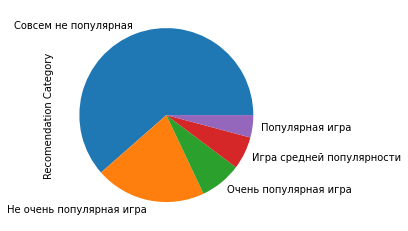

In [123]:
rec_games.plot(kind = 'pie')

<AxesSubplot:title={'center':'Количество игр в Steam в зависимости от количества рекомендаций'}, ylabel='Recomendation Category'>

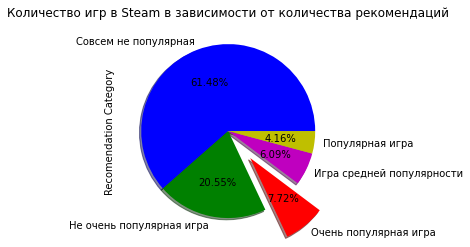

In [124]:
colors = ['b', 'g', 'r','m','y']
rec_games.plot(kind = 'pie',
colors = colors, explode = [0, 0, 0.4, 0, 0], 
    shadow = True, title = 'Количество игр в Steam в зависимости от количества рекомендаций', autopct = '%.2f%%', 
    textprops = {'color': 'k'})

На графиках представлено деление игр в зависимости от их популярности (от количества рекомендаций) в процентах.  
Совсем не популярные игры - 61.48%  
Не очень популярные игры - 20.55%  
Игры средней популярности - 4.16%  
Популярные игры - 4.16%  
Очень популярные игры - 7.72%